# DEA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfparrilla=pd.read_csv('Datos_Parrilla.csv', index_col=[0], parse_dates=True,low_memory=True)
dfparrilla.index=dfparrilla.index.tz_convert(None)
dfparrilla.head(3)

,RACK,AireTotal,FlujoAlimentacionHorno,FlujoCarbonCalcinador,FlujoCarbonHorno,FlujoCombustiblesAlternativos,FN111,FN112,FN113,FN114,...,Pcapafn111,Pcapafn112,Pcapafn113,Pcapota,Pcapa,PcapaSP,Tcal,Velocidad_Parrilla_SP,Velocidad_Parrilla_Transmitido,Estado
_time,,,,,,,,,,,,,,,,,,,,,
2025-03-26 12:13:00,2.129120,1915.581910,89.656479,3.435208,4.196843,0.0,169.783096,171.840881,281.611359,289.109131,...,35.740246,34.325863,18.266560,-0.198767,32.369488,54.0,840.013184,45.0,40.0,1.0
2025-03-26 12:14:00,2.130476,1914.404420,89.568089,3.378349,4.196734,0.0,169.563538,171.643791,279.011246,289.415452,...,35.851418,34.173380,18.554210,-0.192266,32.389152,54.0,843.829162,45.0,40.0,1.0
2025-03-26 12:15:00,2.129487,1918.550295,89.724240,3.355273,4.197753,0.0,170.459091,170.657402,282.567734,291.264283,...,35.968565,33.745039,19.964635,-0.181609,32.416868,54.0,841.367676,45.0,40.0,1.0


In [3]:
dfparrilla=dfparrilla.interpolate(method='linear')

In [4]:
dfparrilla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45887 entries, 2025-03-26 12:13:00 to 2025-04-29 14:38:00
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RACK                            45887 non-null  float64
 1   AireTotal                       45887 non-null  float64
 2   FlujoAlimentacionHorno          45887 non-null  float64
 3   FlujoCarbonCalcinador           45887 non-null  float64
 4   FlujoCarbonHorno                45887 non-null  float64
 5   FlujoCombustiblesAlternativos   45887 non-null  float64
 6   FN111                           45887 non-null  float64
 7   FN112                           45887 non-null  float64
 8   FN113                           45887 non-null  float64
 9   FN114                           45887 non-null  float64
 10  FN115                           45887 non-null  float64
 11  FN116                           45887 non-null  float64
 1

In [5]:
dfparrilla.describe().T

,count,mean,std,min,25%,50%,75%,max
RACK,45887.0,3.686384e+37,9.216301e+37,1.164653e+00,1.446027e+00,1.463444e+00,1.573037e+00,3.185715e+38
AireTotal,45887.0,1.666386e+03,6.248094e+02,1.216363e+02,1.890727e+03,1.957621e+03,1.978428e+03,2.036416e+03
FlujoAlimentacionHorno,45887.0,1.067238e+02,5.285812e+01,0.000000e+00,1.249878e+02,1.344591e+02,1.352258e+02,1.392956e+02
FlujoCarbonCalcinador,45887.0,4.193778e+00,2.129278e+00,0.000000e+00,4.381257e+00,5.078367e+00,5.543893e+00,6.542273e+00
FlujoCarbonHorno,45887.0,3.644210e+00,1.772417e+00,0.000000e+00,4.291966e+00,4.400180e+00,4.566933e+00,8.286109e+00
FlujoCombustiblesAlternativos,45887.0,2.951020e+01,1.109996e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.162096e+03
FN111,45887.0,1.533454e+02,5.998208e+01,8.925424e+00,1.788407e+02,1.802596e+02,1.846117e+02,1.930289e+02
FN112,45887.0,1.570723e+02,5.511935e+01,5.731527e+00,1.782277e+02,1.803517e+02,1.842768e+02,1.956912e+02
FN113,45887.0,2.422937e+02,8.643039e+01,8.229188e+00,2.700802e+02,2.757787e+02,2.882702e+02,3.037615e+02
FN114,45887.0,2.410435e+02,8.838206e+01,1.043998e+01,2.734230e+02,2.780662e+02,2.855003e+02,3.074880e+02


<Axes: xlabel='_time'>

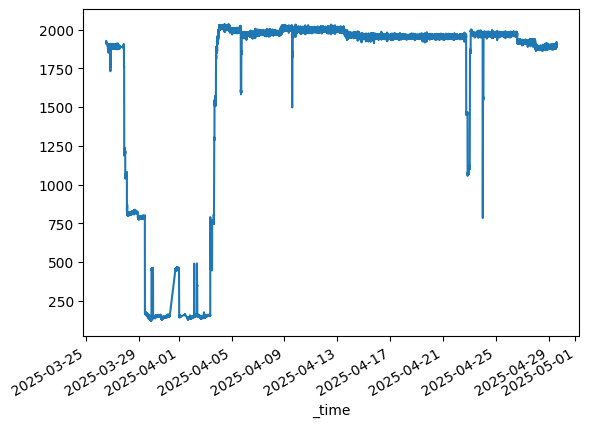

In [6]:
dfparrilla['AireTotal'].plot()

<Axes: xlabel='_time'>

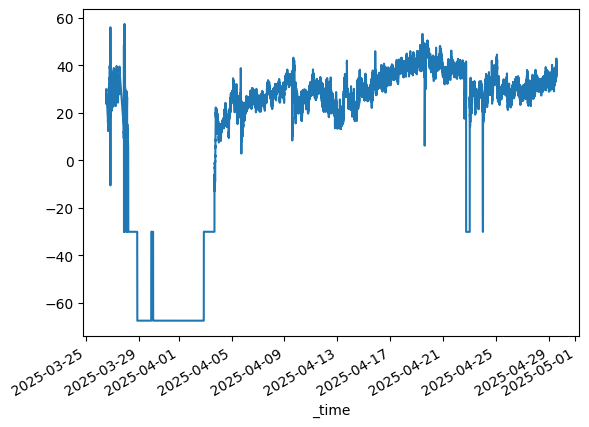

In [7]:
dfparrilla['Torque'].plot()

In [8]:
cond01=(dfparrilla.index.to_period('d')>'2025-04-05')

Funcionamiento

<Axes: xlabel='_time'>

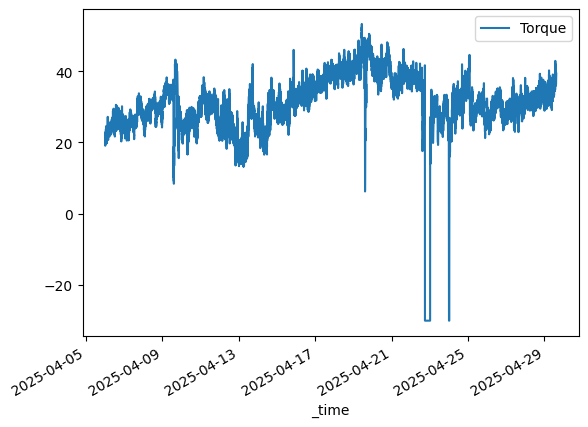

In [9]:
dfparrilla.loc[cond01,['Torque']].plot()

# Todas las variables 

In [10]:
import seaborn as sns

In [11]:
dfpar=dfparrilla.loc[cond01].copy()

In [19]:
dfpar.shape

(33069, 35)

In [20]:
dfpar["Velocidad_parrilla_01"]=dfpar["Velocidad_parrilla_1"].shift(1)
#dfpar["Velocidad_parrilla_02"]=dfpar["Velocidad_parrilla_2"].shift(1)

<Axes: >

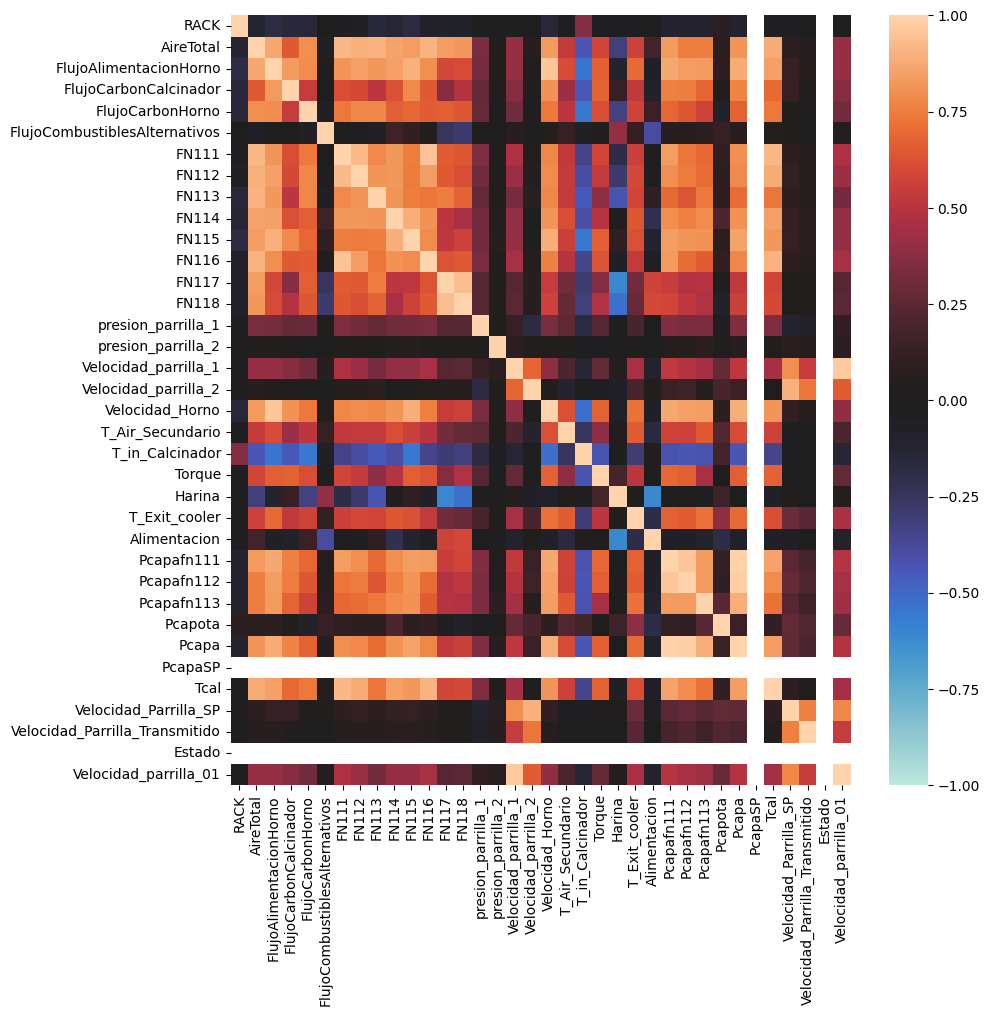

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(dfpar.corr(), vmin=-1.0, vmax=1.0,center=0.0)

In [99]:
dfpar[['FN111', 'FN116', 'Velocidad_parrilla_1', 'Velocidad_parrilla_2', 'T_Exit_cooler', 'Pcapafn111', 'Pcapafn112', 'Pcapa','Velocidad_parrilla_01']].corr()

,FN111,FN116,Velocidad_parrilla_1,Velocidad_parrilla_2,T_Exit_cooler,Pcapafn111,Pcapafn112,Pcapa,Velocidad_parrilla_01
FN111,1.000000,0.950222,0.476297,0.041205,0.557548,0.842112,0.730513,0.800144,0.476194
FN116,0.950222,1.000000,0.454220,0.046381,0.532195,0.830949,0.708849,0.781191,0.460387
Velocidad_parrilla_1,0.476297,0.454220,1.000000,0.682287,0.455550,0.526439,0.491606,0.516398,0.964758
Velocidad_parrilla_2,0.041205,0.046381,0.682287,1.000000,0.194911,0.139998,0.148465,0.132943,0.659873
T_Exit_cooler,0.557548,0.532195,0.455550,0.194911,1.000000,0.672466,0.657037,0.698225,0.461517
Pcapafn111,0.842112,0.830949,0.526439,0.139998,0.672466,1.000000,0.955552,0.985710,0.497585
Pcapafn112,0.730513,0.708849,0.491606,0.148465,0.657037,0.955552,1.000000,0.983674,0.456642
Pcapa,0.800144,0.781191,0.516398,0.132943,0.698225,0.985710,0.983674,1.000000,0.486042
Velocidad_parrilla_01,0.476194,0.460387,0.964758,0.659873,0.461517,0.497585,0.456642,0.486042,1.000000


<Axes: xlabel='_time'>

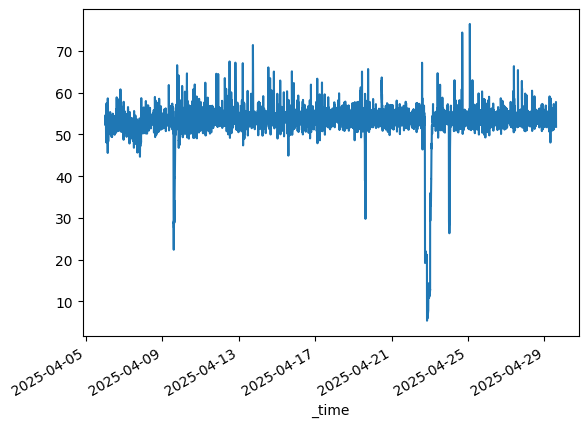

In [113]:
dfpar['Pcapa'].plot()

<Axes: xlabel='_time'>

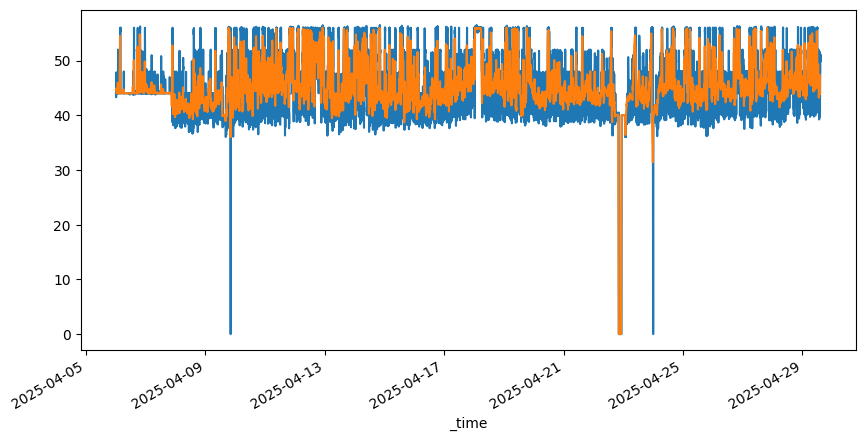

In [123]:
plt.figure(figsize=(10,5))
dfpar['Velocidad_parrilla_1'].plot()
dfpar['Velocidad_parrilla_1'].rolling(25).mean().shift(-25).plot()

#dfpar['Velocidad_parrilla_1'].rolling(150).mean().shift(1).plot()

MODELO

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
(dfpar.corr().iloc[-1].abs()>0.45).values.sum()

np.int64(11)

In [22]:
dfpar.corr().index[dfpar.corr().iloc[-1].abs()>0.45]

Index(['FN111', 'FN116', 'Velocidad_parrilla_1', 'Velocidad_parrilla_2',
       'T_Exit_cooler', 'Pcapafn111', 'Pcapafn112', 'Pcapa',
       'Velocidad_Parrilla_SP', 'Velocidad_Parrilla_Transmitido',
       'Velocidad_parrilla_01'],
      dtype='object')

In [53]:
X_colum=dfpar.corr().index[dfpar.corr().iloc[-1].abs()>0.45].values.tolist()
X_colum=X_colum[:-3]
print(X_colum)

['FN111', 'FN116', 'Velocidad_parrilla_1', 'Velocidad_parrilla_2', 'T_Exit_cooler', 'Pcapafn111', 'Pcapafn112', 'Pcapa']


In [54]:
y_col=['Velocidad_parrilla_01']

In [55]:
Xval=dfpar.dropna().loc[:,X_colum].values
yval=dfpar.dropna().loc[:,y_col].values

In [56]:
X_colum

['FN111',
 'FN116',
 'Velocidad_parrilla_1',
 'Velocidad_parrilla_2',
 'T_Exit_cooler',
 'Pcapafn111',
 'Pcapafn112',
 'Pcapa']

In [57]:
train_size=round(Xval.shape[0]*0.8)

In [58]:
Xej_train=Xval[0:train_size]
Xej_test=Xval[train_size:]
yej_train=yval[0:train_size]
yej_test=yval[train_size:]

In [59]:
Xej_test[15]

array([180.266495, 230.538353,  47.987848,  47.115143, 432.042923,
        59.584435,  54.789272,  54.217713])

In [115]:
random_forest={
    'n_estimators':50,
    'min_samples_split':25,
    'max_depth':100,
    'bootstrap':True
}

In [116]:
pipe_parrilla=Pipeline([('Escalado',StandardScaler()),('Random_Forest',RandomForestRegressor(**random_forest))])

In [117]:
pipe_parrilla.fit(Xej_train,yej_train.ravel())

Pipeline(steps=[('Escalado', StandardScaler()),
                ('Random_Forest',
                 RandomForestRegressor(max_depth=100, min_samples_split=25,
                                       n_estimators=50))])

In [118]:
mean_absolute_error(yej_test.ravel(),pipe_parrilla.predict(Xej_test))

np.float64(0.5134482988254232)

In [119]:
np.sqrt(mean_squared_error(yej_test.ravel(),pipe_parrilla.predict(Xej_test)))

np.float64(0.9180150574956322)

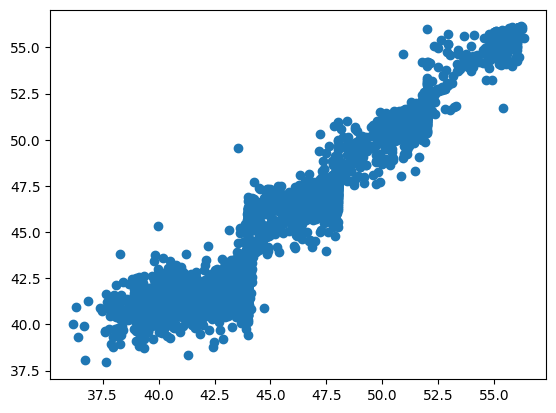

In [120]:
plt.scatter(yej_test.ravel(),pipe_parrilla.predict(Xej_test))

In [39]:
import pickle
filename = 'model.pkl'
pickle.dump(pipe_parrilla, open(filename, 'wb'))

In [32]:
import sklearn

In [34]:
sklearn.__version__


'1.5.2'

In [39]:
Xej_test

array([[40.761753, 44.850626],
       [42.767561, 44.996493],
       [39.946597, 44.95306 ],
       ...,
       [49.852795, 55.454834],
       [50.881746, 54.445107],
       [49.895916, 54.799193]])

In [54]:
diff=yej_test.ravel()-pipe_parrilla.predict(Xej_test)

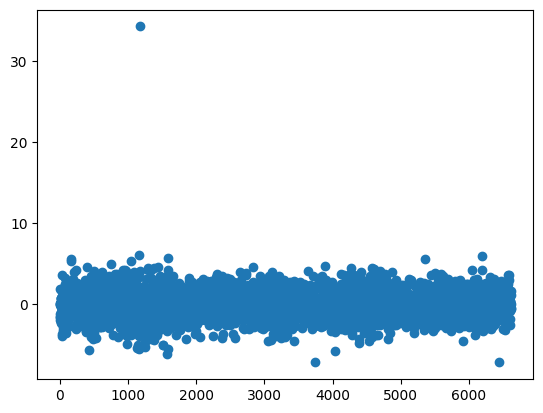

In [55]:
plt.scatter(range(len(diff)),diff)

In [35]:
import mlflow.sklearn

In [57]:
with mlflow.start_run() as run:
    mlflow.sklearn.log_model(pipe_parrilla, "model_vparrilla")


2025/04/29 10:07:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [6]:
import datetime

In [8]:
datetime.datetime.now().isoformat()

'2025-06-19T09:00:34.041047'